In [88]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

In [89]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((512, 512)),
                                transforms.RandomHorizontalFlip(),
                                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

train_dataset = ImageFolder(root="./data/train", transform=transform)
test_dataset = ImageFolder(root='./data/test', transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=8, shuffle=False)

In [90]:
class EmotionModel(nn.Module):
    def __init__(self):
        super(EmotionModel, self).__init__()
        self.conv = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 254 * 254, 64)
        self.fc2 = nn.Linear(64, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = x.view(-1, 16 * 254 * 254)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [91]:
model = EmotionModel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [92]:
epochs = 5

for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        prediction = model(inputs)
        loss = criterion(prediction, labels)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 1 == 0: print(f"Epoch: [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch: [1/5], Loss: 1.1109
Epoch: [2/5], Loss: 1.1094
Epoch: [3/5], Loss: 1.0436
Epoch: [4/5], Loss: 1.0897
Epoch: [5/5], Loss: 1.1810


In [93]:
classes = {
    0:"Angry",
    1:"Happy",
    2:"Sad",
}

In [94]:
image = Image.open("./emotions/sad2.jpg")
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Resize((512, 512))])
image_tensor = transform(image)

predicted_class = model(image_tensor.unsqueeze(0))

with torch.no_grad():
    predicted = torch.argmax(predicted_class)
classes.get(int(predicted))

'Happy'

In [95]:
# rate 

correct, total = 0, 0

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        prediction = model(images)
        predicted = torch.max(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy*100:.2f}%")

Test Accuracy: 37.88%


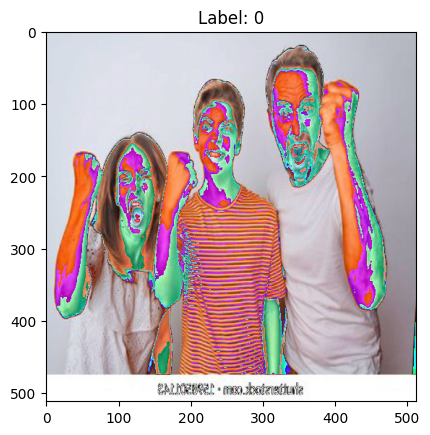

In [96]:
images, labels = train_dataset[55]

images = transforms.ToPILImage()(images)
plt.imshow(images)
plt.title(f"Label: {labels}")
plt.show()